In [ ]:
############################################
# 1. IMPORT LIBRARIES & MOUNT
############################################

import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 100


Mounted at /content/drive


We begin by importing the essential libraries used throughout the project:

pandas and numpy for data manipulation and numerical operations.
random for picking random values or random choices if needed.
seaborn and matplotlib for data visualization.


In [ ]:
############################################
# 2. LOAD DATASET
############################################

missing_values = [
    "Not Available", "N/A", "na", "NaN", "nan",
    "NULL", "Unknown", "--", "not available",
    "unknown", "null", ""
]

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ResourcesFromGroupWork/corrupted_dataset-Arbaaz.csv", na_values=missing_values)

print("Initial dataset shape:", df.shape)
df.head(10)


Initial dataset shape: (11123, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,NaN,84.0,low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,NaN,No,High School,near,Male,67
1,19.0,64.0,Low,Medium,No,NaN,59,Low,Yes,2,medium,Medium,Public,Negative,4,No,College,Moderate,female,61
2,24.0,98.0,Medium,medium,Yes,7,91,Medium,Yes,2,Medium,Medium,NaN,Neutral,4,No,Postgraduate,Near,Male,NaN
3,29.0,89.0,Low,Medium,Yes,8,98,Medium,Yes,NaN,Medium,Medium,Public,NaN,NaN,NaN,NaN,Moderate,Male,71
4,19.0,92.0,Medium,Medium,Yes,NaN,sixty-five,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,near,Female,70
5,19.0,88.0,Medium,Medium,Yes,NaN,NaN,NaN,Yes,3,Medium,Medium,NaN,Positive,3,NaN,Postgraduate,NaN,NaN,71
6,29.0,84.0,NaN,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,sixty-seven
7,25.0,78.0,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,NaN,2,No,high school,Far,Male,NaN
8,17.0,94.0,Medium,High,No,six,80,NaN,Yes,0,NaN,Low,Private,Neutral,1,No,College,Near,Male,69
9,23.0,98.0,Medium,Medium,Yes,NaN,71,Medium,Yes,0,High,NaN,Public,Positive,5,No,High School,Moderate,Male,72


We define a list of missing_values placeholders, such as "Not Available", "N/A", and "". This ensures that when pandas reads the CSV, any cell matching these strings becomes a NaN (missing value).
We specify the file_path to our CSV.
pd.read_csv loads the data into a DataFrame df. The parameter na_values=missing_values tells pandas to treat those strings as missing.
We then print the initial shape of the DataFrame to see how many rows/columns we have, and df.head(10) shows the first 10 rows so we can quickly inspect what the raw data looks like.

In [ ]:
############################################
# 3. REMOVE DUPLICATES
############################################

df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print("After removing duplicates, shape =", df.shape)


After removing duplicates, shape = (11096, 20)


drop_duplicates scans the DataFrame for any exact duplicate rows and removes them. This prevents counting the same record multiple times.
reset_index(drop=True) reassigns a new integer index from 0 to len(df)-1.
We print the new shape to confirm how many rows remain after duplicates are removed. This helps keep the data unique and consistent.

In [ ]:
############################################
# 4. QUICK INSPECTION
############################################

print("\n--- INFO ---")
df.info()

print("\n--- DESCRIBE (include='all') ---")
display(df.describe(include='all'))

print("\n--- SAMPLE ROWS ---")
display(df.sample(5))



--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11096 entries, 0 to 11095
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               10121 non-null  float64
 1   Attendance                  10104 non-null  float64
 2   Parental_Involvement        10135 non-null  object 
 3   Access_to_Resources         10133 non-null  object 
 4   Extracurricular_Activities  10144 non-null  object 
 5   Sleep_Hours                 10103 non-null  object 
 6   Previous_Scores             10134 non-null  object 
 7   Motivation_Level            10136 non-null  object 
 8   Internet_Access             10155 non-null  object 
 9   Tutoring_Sessions           10058 non-null  object 
 10  Family_Income               10140 non-null  object 
 11  Teacher_Quality             10035 non-null  object 
 12  School_Type                 10139 non-null  object 
 13  Peer_Influence   

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,10121.000000,10104.000000,10135,10133,10144,10103,10134,10136,10155,10058,10140,10035,10139,10123,10125,10108,9998,10022,10117,10097
unique,NaN,NaN,6,6,4,14,102,6,4,17,6,6,4,6,14,4,6,6,4,69
top,NaN,NaN,Medium,Medium,Yes,7,94,Medium,Yes,1,Medium,Medium,Public,Positive,3,No,High School,Near,Male,68
freq,NaN,NaN,4820,4807,5682,2516,251,4867,8791,3089,3811,5602,6547,3755,3645,8419,4671,5527,5443,1123
mean,19.986958,79.943686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.977976,11.602318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,60.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,16.000000,70.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,20.000000,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,24.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--- SAMPLE ROWS ---


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6644,21.0,87.0,Low,Low,Yes,6,82,Medium,Yes,NaN,Medium,high,Public,Neutral,5,No,NaN,Near,Female,68
5905,18.0,90.0,high,medium,No,7,eighty-one,Medium,Yes,2,Medium,Low,Public,NaN,3,no,Postgraduate,NaN,Male,69
1997,15.0,99.0,Low,Medium,Yes,8,94,Medium,Yes,2,Medium,Medium,Private,Neutral,3,No,Postgraduate,NaN,Male,71
4228,22.0,66.0,Medium,Medium,No,6,63,High,Yes,1,Low,Medium,NaN,neutral,5,No,Postgraduate,Far,Male,64
10699,NaN,NaN,NaN,NaN,No,5,79,High,Yes,two,Low,Low,Private,Positive,3,No,High School,NaN,Female,seventy-one


df.info(): Summarizes each column’s data type, the number of non-null values, and the overall memory usage. This helps identify columns with missing data or incorrect data types.
df.describe(include='all'): Gives a statistical summary for all columns—both numeric (mean, std, min, max) and categorical (count, unique, top, freq).
df.sample(5): Displays 5 random rows so we can see the variety of entries. This can reveal unexpected placeholders or anomalies that might not appear in the first few rows.

In [ ]:
############################################
# 5. CONVERT WRITTEN-OUT NUMBERS TO DIGITS
############################################

word_to_number_dict = {
    "zero": 0, "one": 1, "two": 2, "three": 3, "four": 4,
    "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9,
    "ten": 10, "eleven": 11, "twelve": 12, "thirteen": 13,
    "fourteen": 14, "fifteen": 15, "sixteen": 16,
    "seventeen": 17, "eighteen": 18, "nineteen": 19
}
tens_dict = {
    "twenty": 20, "thirty": 30, "forty": 40, "fifty": 50,
    "sixty": 60, "seventy": 70, "eighty": 80, "ninety": 90
}

def words_to_numbers(value):
    """Convert English words (like 'sixty-five') to an integer if possible."""
    if not isinstance(value, str):
        return value  # If it's already numeric or NaN, return as-is

    word = value.strip().lower()
    # Direct 0-19
    if word in word_to_number_dict:
        return word_to_number_dict[word]
    # Direct tens (20,30,...90)
    if word in tens_dict:
        return tens_dict[word]
    # Compound numbers "twenty-three", "ninety-nine", etc.
    if "-" in word:
        parts = word.split("-")
        if len(parts) == 2:
            part1, part2 = parts
            if part1 in tens_dict and part2 in word_to_number_dict:
                return tens_dict[part1] + word_to_number_dict[part2]
    # Not recognized => return original
    return value

# Define numeric columns that might have textual numbers
possible_text_nums = [
    "Hours_Studied", "Sleep_Hours", "Previous_Scores",
    "Tutoring_Sessions", "Physical_Activity", "Exam_Score"
]

# Converting
for col in possible_text_nums:
    if col in df.columns:
        df[col] = df[col].apply(words_to_numbers)


Some numeric columns may contain textual representations (e.g., "sixty-five") that should be actual numbers (65).
words_to_numbers tries to convert words like "twenty-three" into the correct integer. If it can’t, it returns the original value.
We apply this function only to columns we suspect might have textual numeric data (like Hours_Studied, Sleep_Hours, etc.).
This step ensures we don’t have strings like "eight" in numeric columns.

In [ ]:
############################################
# 6. FORCE NUMERIC COLUMNS
############################################

# We expect these columns to be numeric
numeric_cols = [
    "Hours_Studied", "Attendance", "Sleep_Hours",
    "Previous_Scores", "Tutoring_Sessions",
    "Physical_Activity", "Exam_Score",
    "Family_Income"  # If it exists
]

for col in numeric_cols:
    if col in df.columns:
        # Convert to numeric, coerce to NaN if unconvertible
        df[col] = pd.to_numeric(df[col], errors='coerce')


We define numeric_cols as columns that we want to be numeric.
pd.to_numeric with errors='coerce' attempts to convert each entry to a float. If it can’t (e.g., leftover text), it becomes NaN.
This step is critical if the dataset has inconsistent types. By the end, these columns are guaranteed to be numeric or missing.

In [ ]:
############################################
# 7. FIX INCONSISTENT STRINGS (e.g. 'low' -> 'Low')
############################################

df.replace({"low": "Low", "high": "High", "medium": "Medium"}, inplace=True)

# Also unify 'Male'/'Female' if needed
# More robust approach below with mapping


If we see columns containing strings like "low", "Low", or "LOW", we unify them to a standard.
This line specifically addresses “low/high/medium” cases, ensuring consistent capitalization.
We might have already handled them in a later step, but doing it here can help if any columns remain as strings.

In [ ]:
############################################
# 8. HANDLE MISSING VALUES
############################################

# (A) Numeric columns => fill with median
for col in numeric_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)

# (B) Categorical columns => fill with mode
# Define some likely categorical columns
cat_cols = [
    "Parental_Involvement", "Access_to_Resources", "Extracurricular_Activities",
    "Motivation_Level", "Internet_Access", "School_Type", "Peer_Influence",
    "Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home",
    "Gender", "Teacher_Quality"
    # If 'Family_Income' is actually numeric => skip. If ordinal => we handle separately.
]

for col in cat_cols:
    if col in df.columns:
        most_freq = df[col].mode(dropna=True)
        if not most_freq.empty:
            df[col] = df[col].fillna(most_freq[0])


For numeric columns, we compute the median and fill any NaN with that median. This is robust to outliers and ensures no numeric column remains missing.
For categorical columns, we pick the mode (most frequent category) and fill missing values with that. This is a simple approach that ensures each category remains consistent.
Family_Income: If we discovered that the entire column was missing, we fill it with a default numeric value (e.g., 2.0, signifying “Medium”). If only partial data is missing, we fill with the median.

In [ ]:
############################################
# 9. NORMALIZE CATEGORICAL STRINGS
############################################

def normalize_strings(series, valid_values):
    """ Convert series to lowercase, strip spaces, map to valid_values if found. """
    series = series.astype(str).str.strip().str.lower()
    mapping = {v.lower(): v for v in valid_values}
    return series.map(mapping).fillna(series)  # if not found, keep original

# For "Low"/"Medium"/"High" columns:
lmh_cols = ["Parental_Involvement", "Access_to_Resources", "Motivation_Level", "Teacher_Quality"]
for col in lmh_cols:
    if col in df.columns:
        df[col] = normalize_strings(df[col], ["Low", "Medium", "High"])

# For yes/no columns:
yn_cols = ["Internet_Access", "Extracurricular_Activities", "Learning_Disabilities"]
for col in yn_cols:
    if col in df.columns:
        df[col] = normalize_strings(df[col], ["Yes", "No"])

# For "School_Type" => "Public"/"Private"
if "School_Type" in df.columns:
    df["School_Type"] = normalize_strings(df["School_Type"], ["Public", "Private"])

# For "Peer_Influence" => "Positive"/"Neutral"/"Negative"
if "Peer_Influence" in df.columns:
    df["Peer_Influence"] = normalize_strings(df["Peer_Influence"], ["Positive", "Neutral", "Negative"])

# For "Distance_from_Home" => "Near"/"Moderate"/"Far"
if "Distance_from_Home" in df.columns:
    df["Distance_from_Home"] = normalize_strings(df["Distance_from_Home"], ["Near", "Moderate", "Far"])

# For "Parental_Education_Level" => "High School", "College", "Postgraduate"
if "Parental_Education_Level" in df.columns:
    df["Parental_Education_Level"] = normalize_strings(df["Parental_Education_Level"],
                                                       ["High School", "College", "Postgraduate"])

# For "Gender" => "Male"/"Female"
if "Gender" in df.columns:
    df["Gender"] = normalize_strings(df["Gender"], ["Male", "Female"])


This function takes a pandas Series and a list of valid_values (e.g., ["Low", "Medium", "High"]).
It converts everything to lowercase, strips whitespace, and tries to match them to the valid set.
If an entry matches, it’s replaced with the correct casing (e.g., “low” → “Low”).
If it doesn’t match, we leave it as-is.
We apply it to columns like Parental_Involvement, Internet_Access, etc. to ensure consistent strings.

In [ ]:
############################################
# 10. MAP CATEGORIES TO NUMERIC
############################################

mapping_dict = {
    "Parental_Involvement": {"low": 0.33, "medium": 0.66, "high": 0.99},
    "Access_to_Resources": {"low": 0.33, "medium": 0.66, "high": 0.99},
    "Motivation_Level": {"low": 0.33, "medium": 0.66, "high": 0.99},
    "Teacher_Quality": {"low": 0.33, "medium": 0.66, "high": 0.99},
    "Peer_Influence": {"positive": 0.33, "neutral": 0.66, "negative": 0.99},
    "Distance_from_Home": {"near": 0.33, "moderate": 0.66, "far": 0.99},
    "Parental_Education_Level": {"high school": 0.33, "college": 0.66, "postgraduate": 0.99},
    "Internet_Access": {"yes": 1.0, "no": 0.0},
    "Extracurricular_Activities": {"yes": 1.0, "no": 0.0},
    "Learning_Disabilities": {"yes": 1.0, "no": 0.0},
    "School_Type": {"public": 1.0, "private": 0.0},
    "Gender": {"male": 1.0, "female": 0.0}
}

for col, col_map in mapping_dict.items():
    if col in df.columns:
        df[col] = df[col].replace(col_map)


For ordinal categories like “Low/Medium/High,” we choose numeric codes (0.33, 0.66, 0.99) to reflect a progression.
For yes/no columns, we use 1.0 and 0.0.
For Gender, we might pick 1.0 for “Male” and 0.0 for “Female.”
This step ensures the final dataset is entirely numeric, which is essential for many ML algorithms.

In [ ]:
############################################
# 11. OPTIONAL: CLIP & SCALE NUMERIC
############################################

# Outlier clipping & standardizing 'Hours_Studied'
if "Hours_Studied" in df.columns:
    lb = np.percentile(df["Hours_Studied"], 1)
    ub = np.percentile(df["Hours_Studied"], 99)
    df["Hours_Studied"] = df["Hours_Studied"].clip(lb, ub)

    mean_val = df["Hours_Studied"].mean()
    std_val = df["Hours_Studied"].std()
    df["Hours_Studied"] = (df["Hours_Studied"] - mean_val) / std_val

# Could scale 'Sleep_Hours', 'Physical_Activity', etc.


Outlier clipping: We take the 1st and 99th percentiles of Hours_Studied and clip any values below or above that range. This reduces extreme outliers.
Standardization: We then transform it to have mean=0 and std=1, so Hours_Studied becomes easier for certain ML models to handle.
You can replicate this approach for other columns if you want uniform scaling or outlier handling across the dataset.

In [ ]:
############################################
# 12. FINAL CHECK
############################################

print("\n--- FINAL df.info() ---")
df.info()

print("\n--- HEAD ---")
display(df.head(10))

# Confirm no missing values
print("\n--- MISSING VALUES ---")
print(df.isnull().sum())



--- FINAL df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11096 entries, 0 to 11095
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               11096 non-null  float64
 1   Attendance                  11096 non-null  float64
 2   Parental_Involvement        11096 non-null  object 
 3   Access_to_Resources         11096 non-null  object 
 4   Extracurricular_Activities  11096 non-null  object 
 5   Sleep_Hours                 11096 non-null  float64
 6   Previous_Scores             11096 non-null  float64
 7   Motivation_Level            11096 non-null  object 
 8   Internet_Access             11096 non-null  object 
 9   Tutoring_Sessions           11096 non-null  float64
 10  Family_Income               0 non-null      float64
 11  Teacher_Quality             11096 non-null  object 
 12  School_Type                 11096 non-null  object 
 13  Peer_I

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,0.000419,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,NaN,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,-0.178217,64.0,Low,Medium,No,7.0,59.0,Low,Yes,2.0,NaN,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,0.714962,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,NaN,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,67.0
3,1.608142,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,NaN,Medium,Public,Positive,3.0,No,High School,Moderate,Male,71.0
4,-0.178217,92.0,Medium,Medium,Yes,7.0,65.0,Medium,Yes,3.0,NaN,High,Public,Neutral,4.0,No,College,Near,Female,70.0
5,-0.178217,88.0,Medium,Medium,Yes,7.0,75.0,Medium,Yes,3.0,NaN,Medium,Public,Positive,3.0,No,Postgraduate,Near,Male,71.0
6,1.608142,84.0,Medium,Low,Yes,7.0,68.0,Low,Yes,1.0,NaN,Medium,Private,Neutral,2.0,No,High School,Moderate,Male,67.0
7,0.893598,78.0,Low,High,Yes,6.0,50.0,Medium,Yes,1.0,NaN,High,Public,Positive,2.0,No,High School,Far,Male,67.0
8,-0.535489,94.0,Medium,High,No,6.0,80.0,Medium,Yes,0.0,NaN,Low,Private,Neutral,1.0,No,College,Near,Male,69.0
9,0.536326,98.0,Medium,Medium,Yes,7.0,71.0,Medium,Yes,0.0,NaN,Medium,Public,Positive,5.0,No,High School,Moderate,Male,72.0



--- MISSING VALUES ---
Hours_Studied                     0
Attendance                        0
Parental_Involvement              0
Access_to_Resources               0
Extracurricular_Activities        0
Sleep_Hours                       0
Previous_Scores                   0
Motivation_Level                  0
Internet_Access                   0
Tutoring_Sessions                 0
Family_Income                 11096
Teacher_Quality                   0
School_Type                       0
Peer_Influence                    0
Physical_Activity                 0
Learning_Disabilities             0
Parental_Education_Level          0
Distance_from_Home                0
Gender                            0
Exam_Score                        0
dtype: int64


df.info() once more, to confirm that columns are now the correct type (float64 or int64 for numeric, etc.) and that we have 0 missing values in the columns we’ve handled.
We display the first 10 rows to see if the transformations make sense (e.g., ordinal columns turned to numeric codes, textual columns replaced with numeric or consistent categories).
df.isnull().sum() is a final check that no columns remain with missing data.

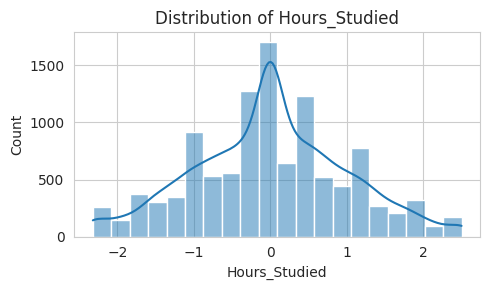

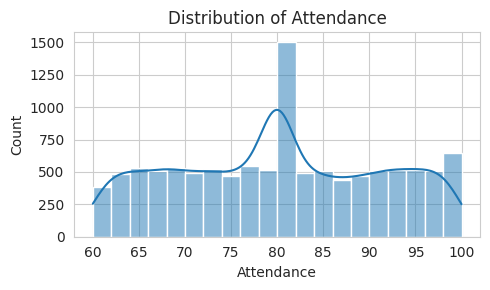

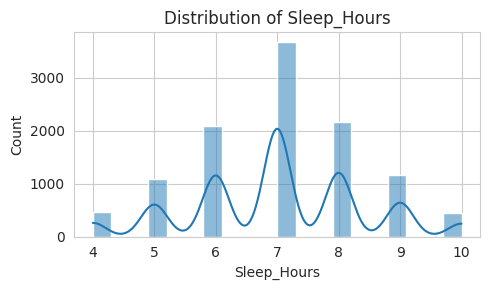

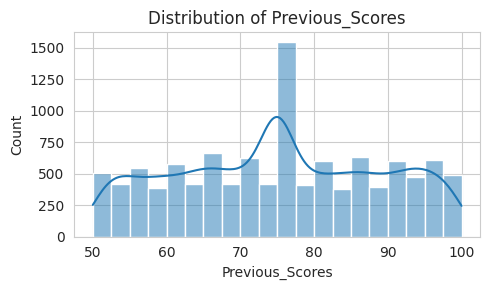

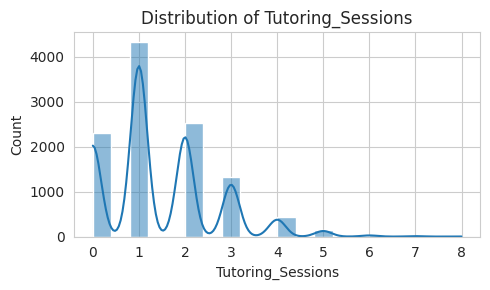

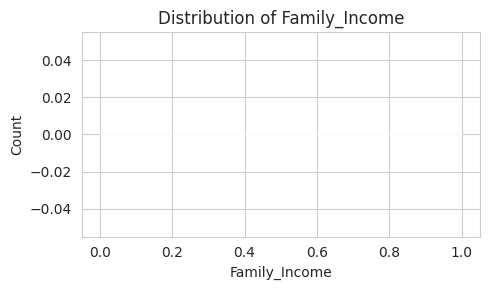

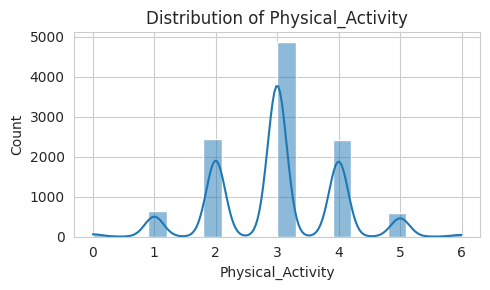

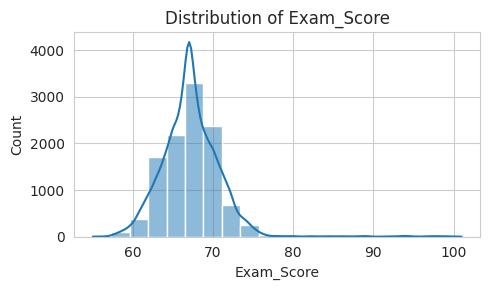

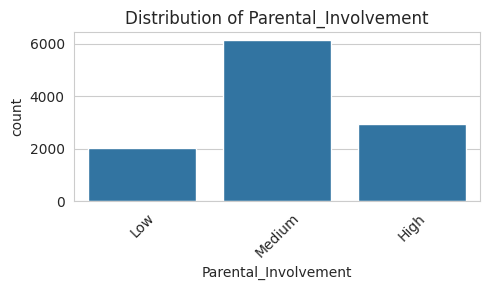

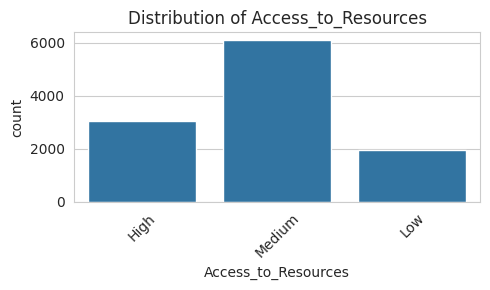

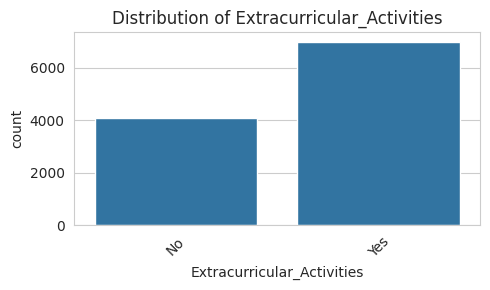

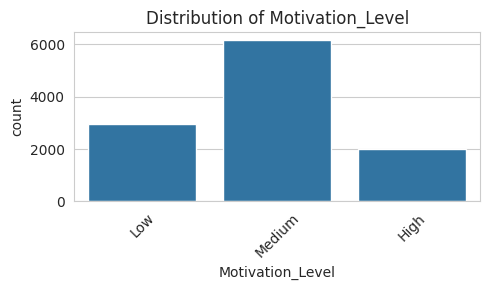

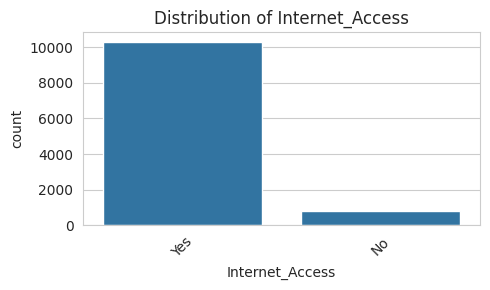

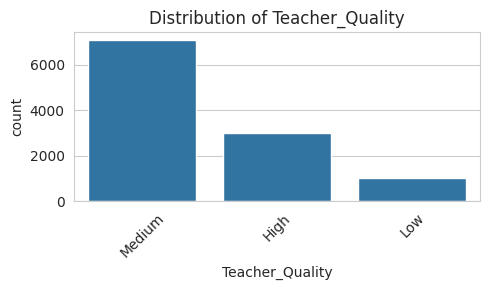

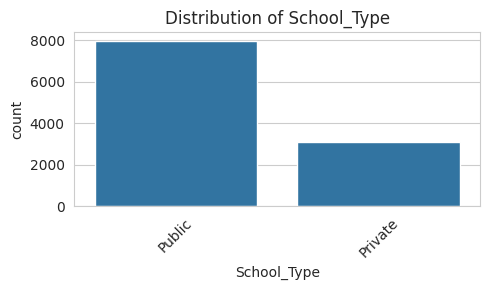

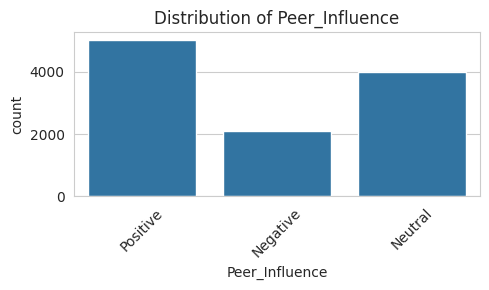

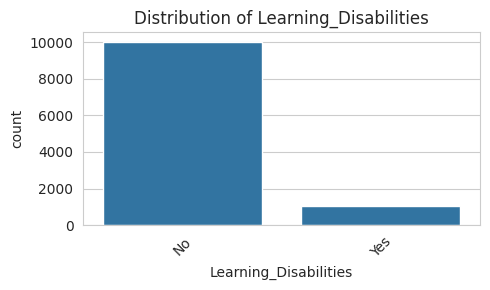

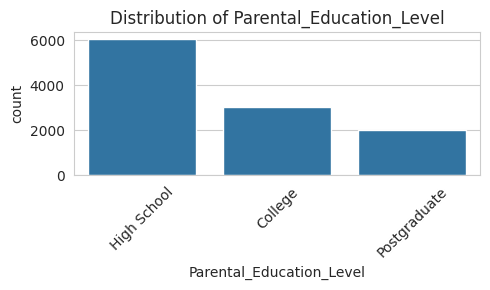

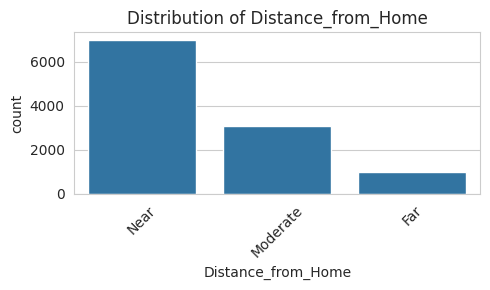

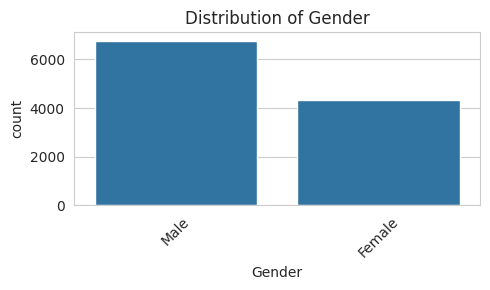

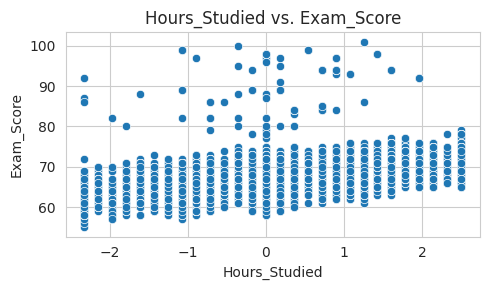

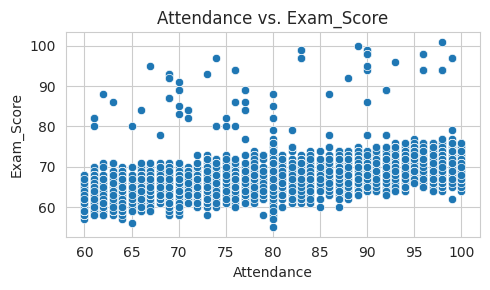

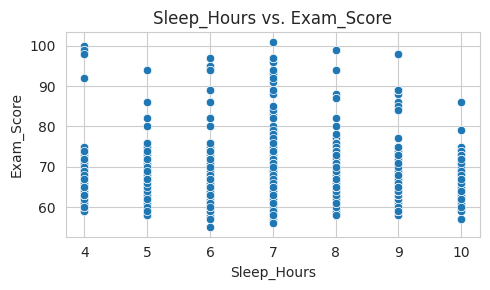

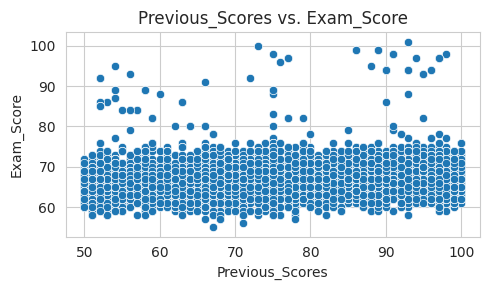

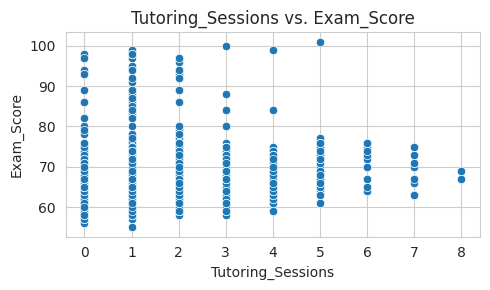

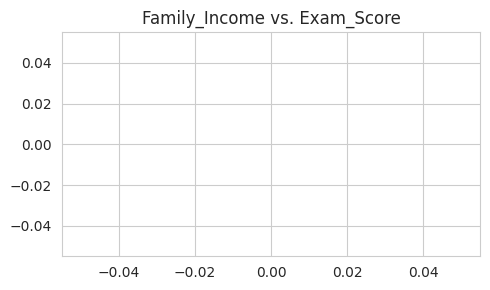

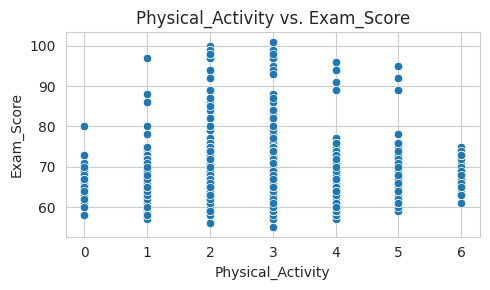

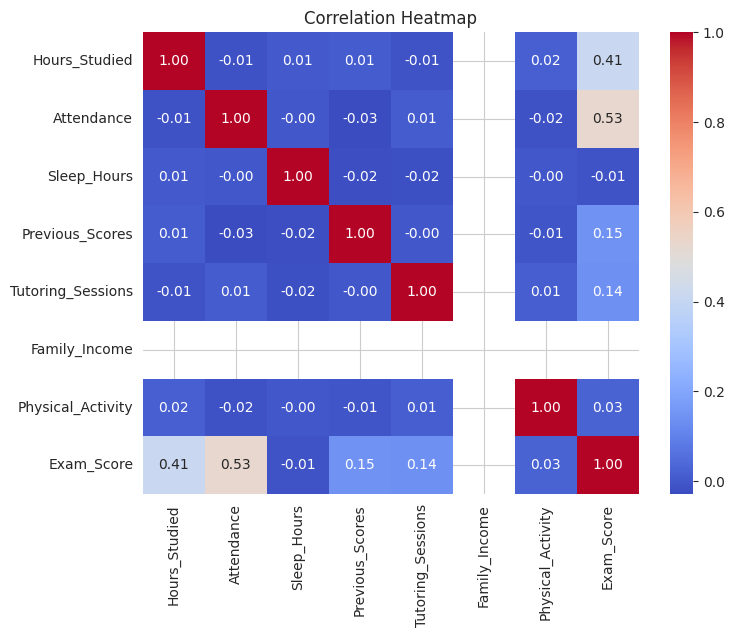

In [ ]:
############################################
# 13. EXPLORATORY DATA ANALYSIS
############################################

# (A) Histograms for numeric columns
num_cols_for_plot = df.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols_for_plot:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# (B) Countplots for any columns still object dtype
cat_cols_for_plot = df.select_dtypes(include=[object]).columns.tolist()

for col in cat_cols_for_plot:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# (C) Scatter: each numeric vs. 'Exam_Score' (if it exists)
if "Exam_Score" in df.columns:
    for col in num_cols_for_plot:
        if col != "Exam_Score":
            plt.figure(figsize=(5,3))
            sns.scatterplot(x=df[col], y=df["Exam_Score"])
            plt.title(f"{col} vs. Exam_Score")
            plt.tight_layout()
            plt.show()

# (D) Correlation Heatmap
num_data = df.select_dtypes(include=[np.number])
if num_data.shape[1] > 1:
    plt.figure(figsize=(8,6))
    corr = num_data.corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()


Histograms show the distribution (skew, outliers, shape) of each numeric column. We typically look for heavily skewed data or unusual lumps.
Countplots show how frequently each category appears. This can reveal if a category is dominant or if the distribution is balanced.
Scatter plots vs. Exam_Score can highlight whether a numeric feature (e.g., Hours_Studied) correlates with final exam performance. A positive slope might indicate more studying = higher score.
Correlation Heatmap is a quick way to see which numeric features are strongly or weakly correlated. Cells near +1 or -1 indicate a strong positive/negative relationship.

In [ ]:
############################################
# 14. SAVE CLEANED DATASET
############################################

df.to_csv("/content/drive/MyDrive/Colab Notebooks/ResourcesFromGroupWork/cleaned_student_performance.csv", index=False)
print("Cleaned dataset saved to 'cleaned_student_performance.csv'")


Cleaned dataset saved to 'cleaned_student_performance.csv'


Finally, we write the fully cleaned and preprocessed DataFrame to a new CSV file, ensuring we don’t lose our transformations. This helps if we want to skip re-running the entire cleaning pipeline next time and go straight to modeling.

=== Histograms & KDE for Numeric Columns ===


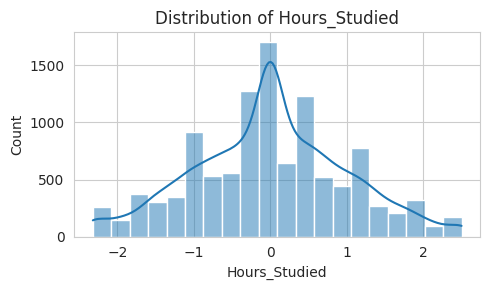

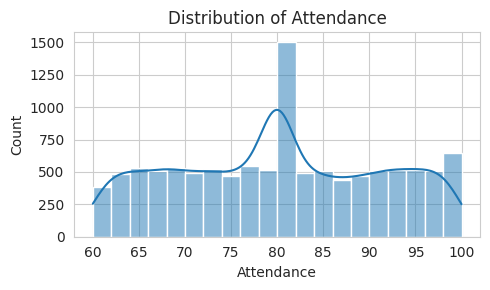

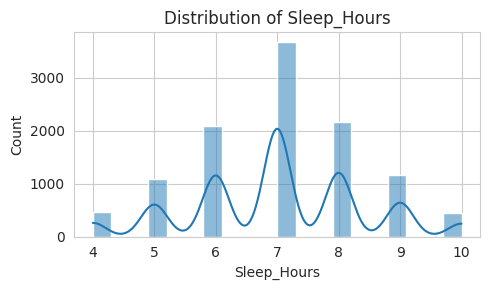

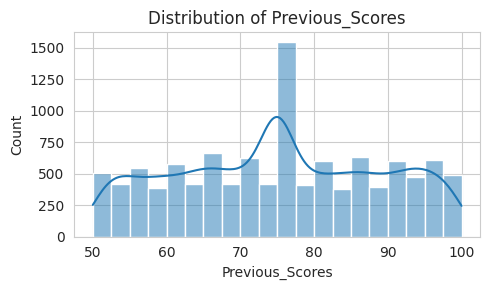

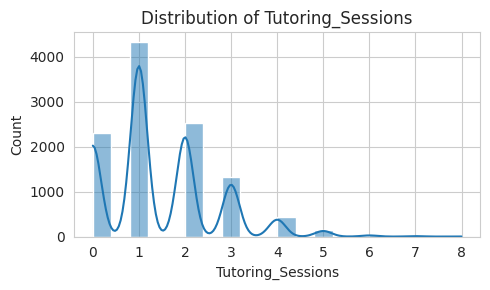

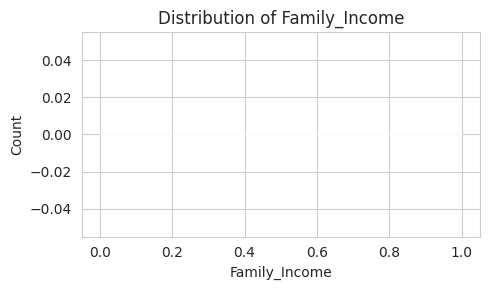

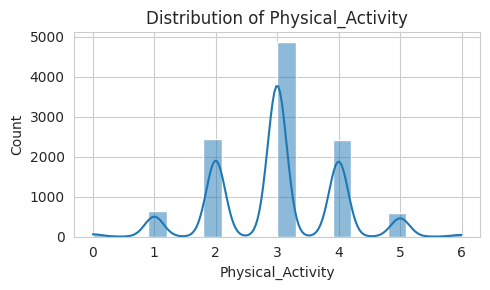

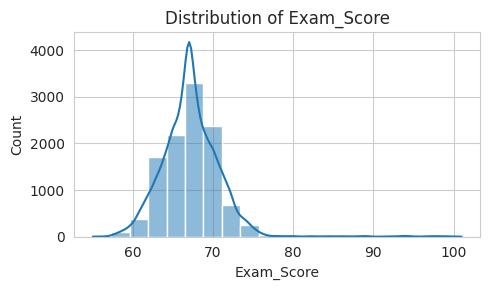

=== Countplots for Categorical Columns ===


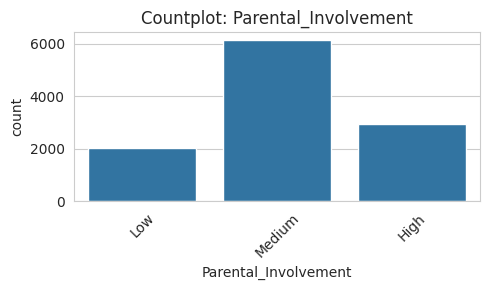

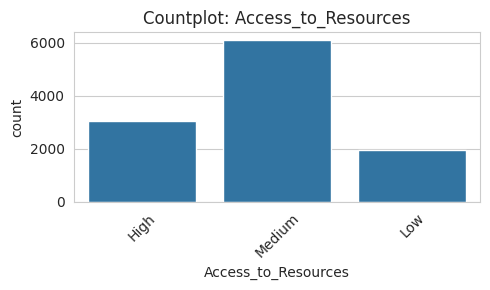

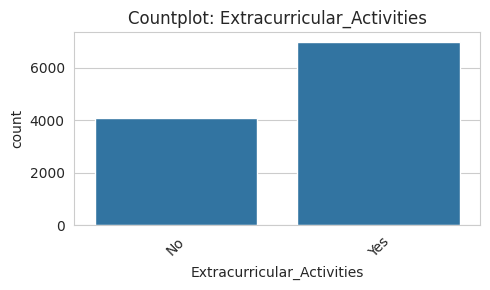

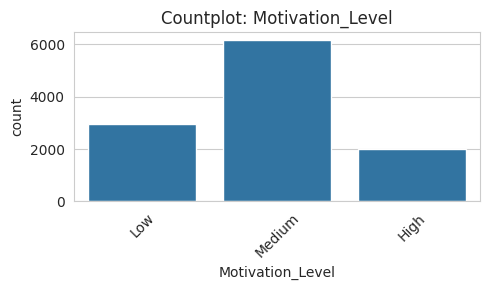

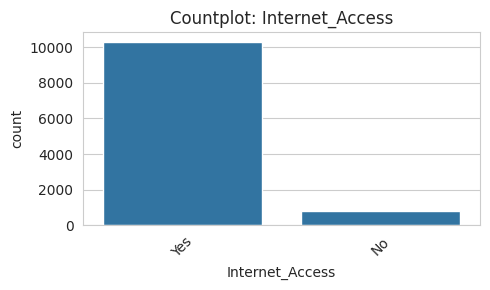

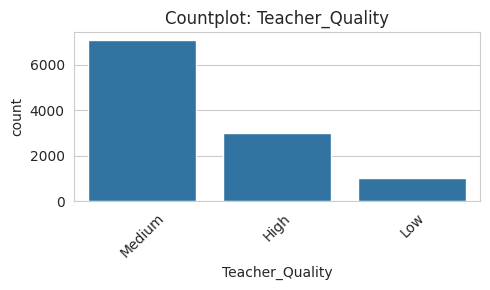

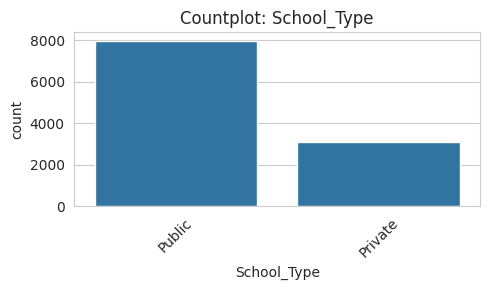

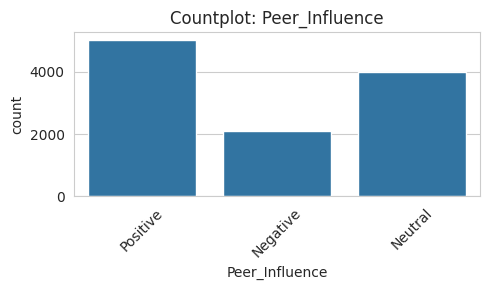

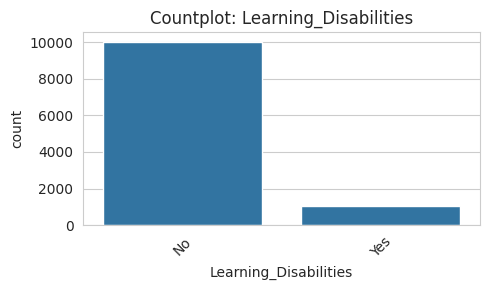

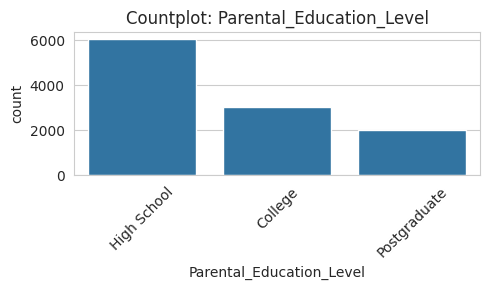

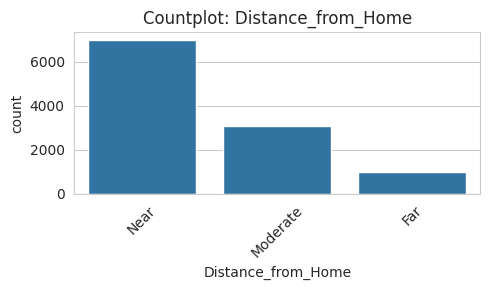

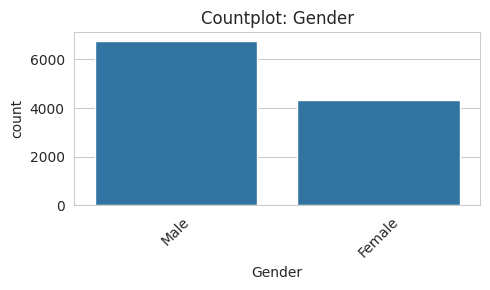

=== Pairwise Scatter (Pairplot) ===


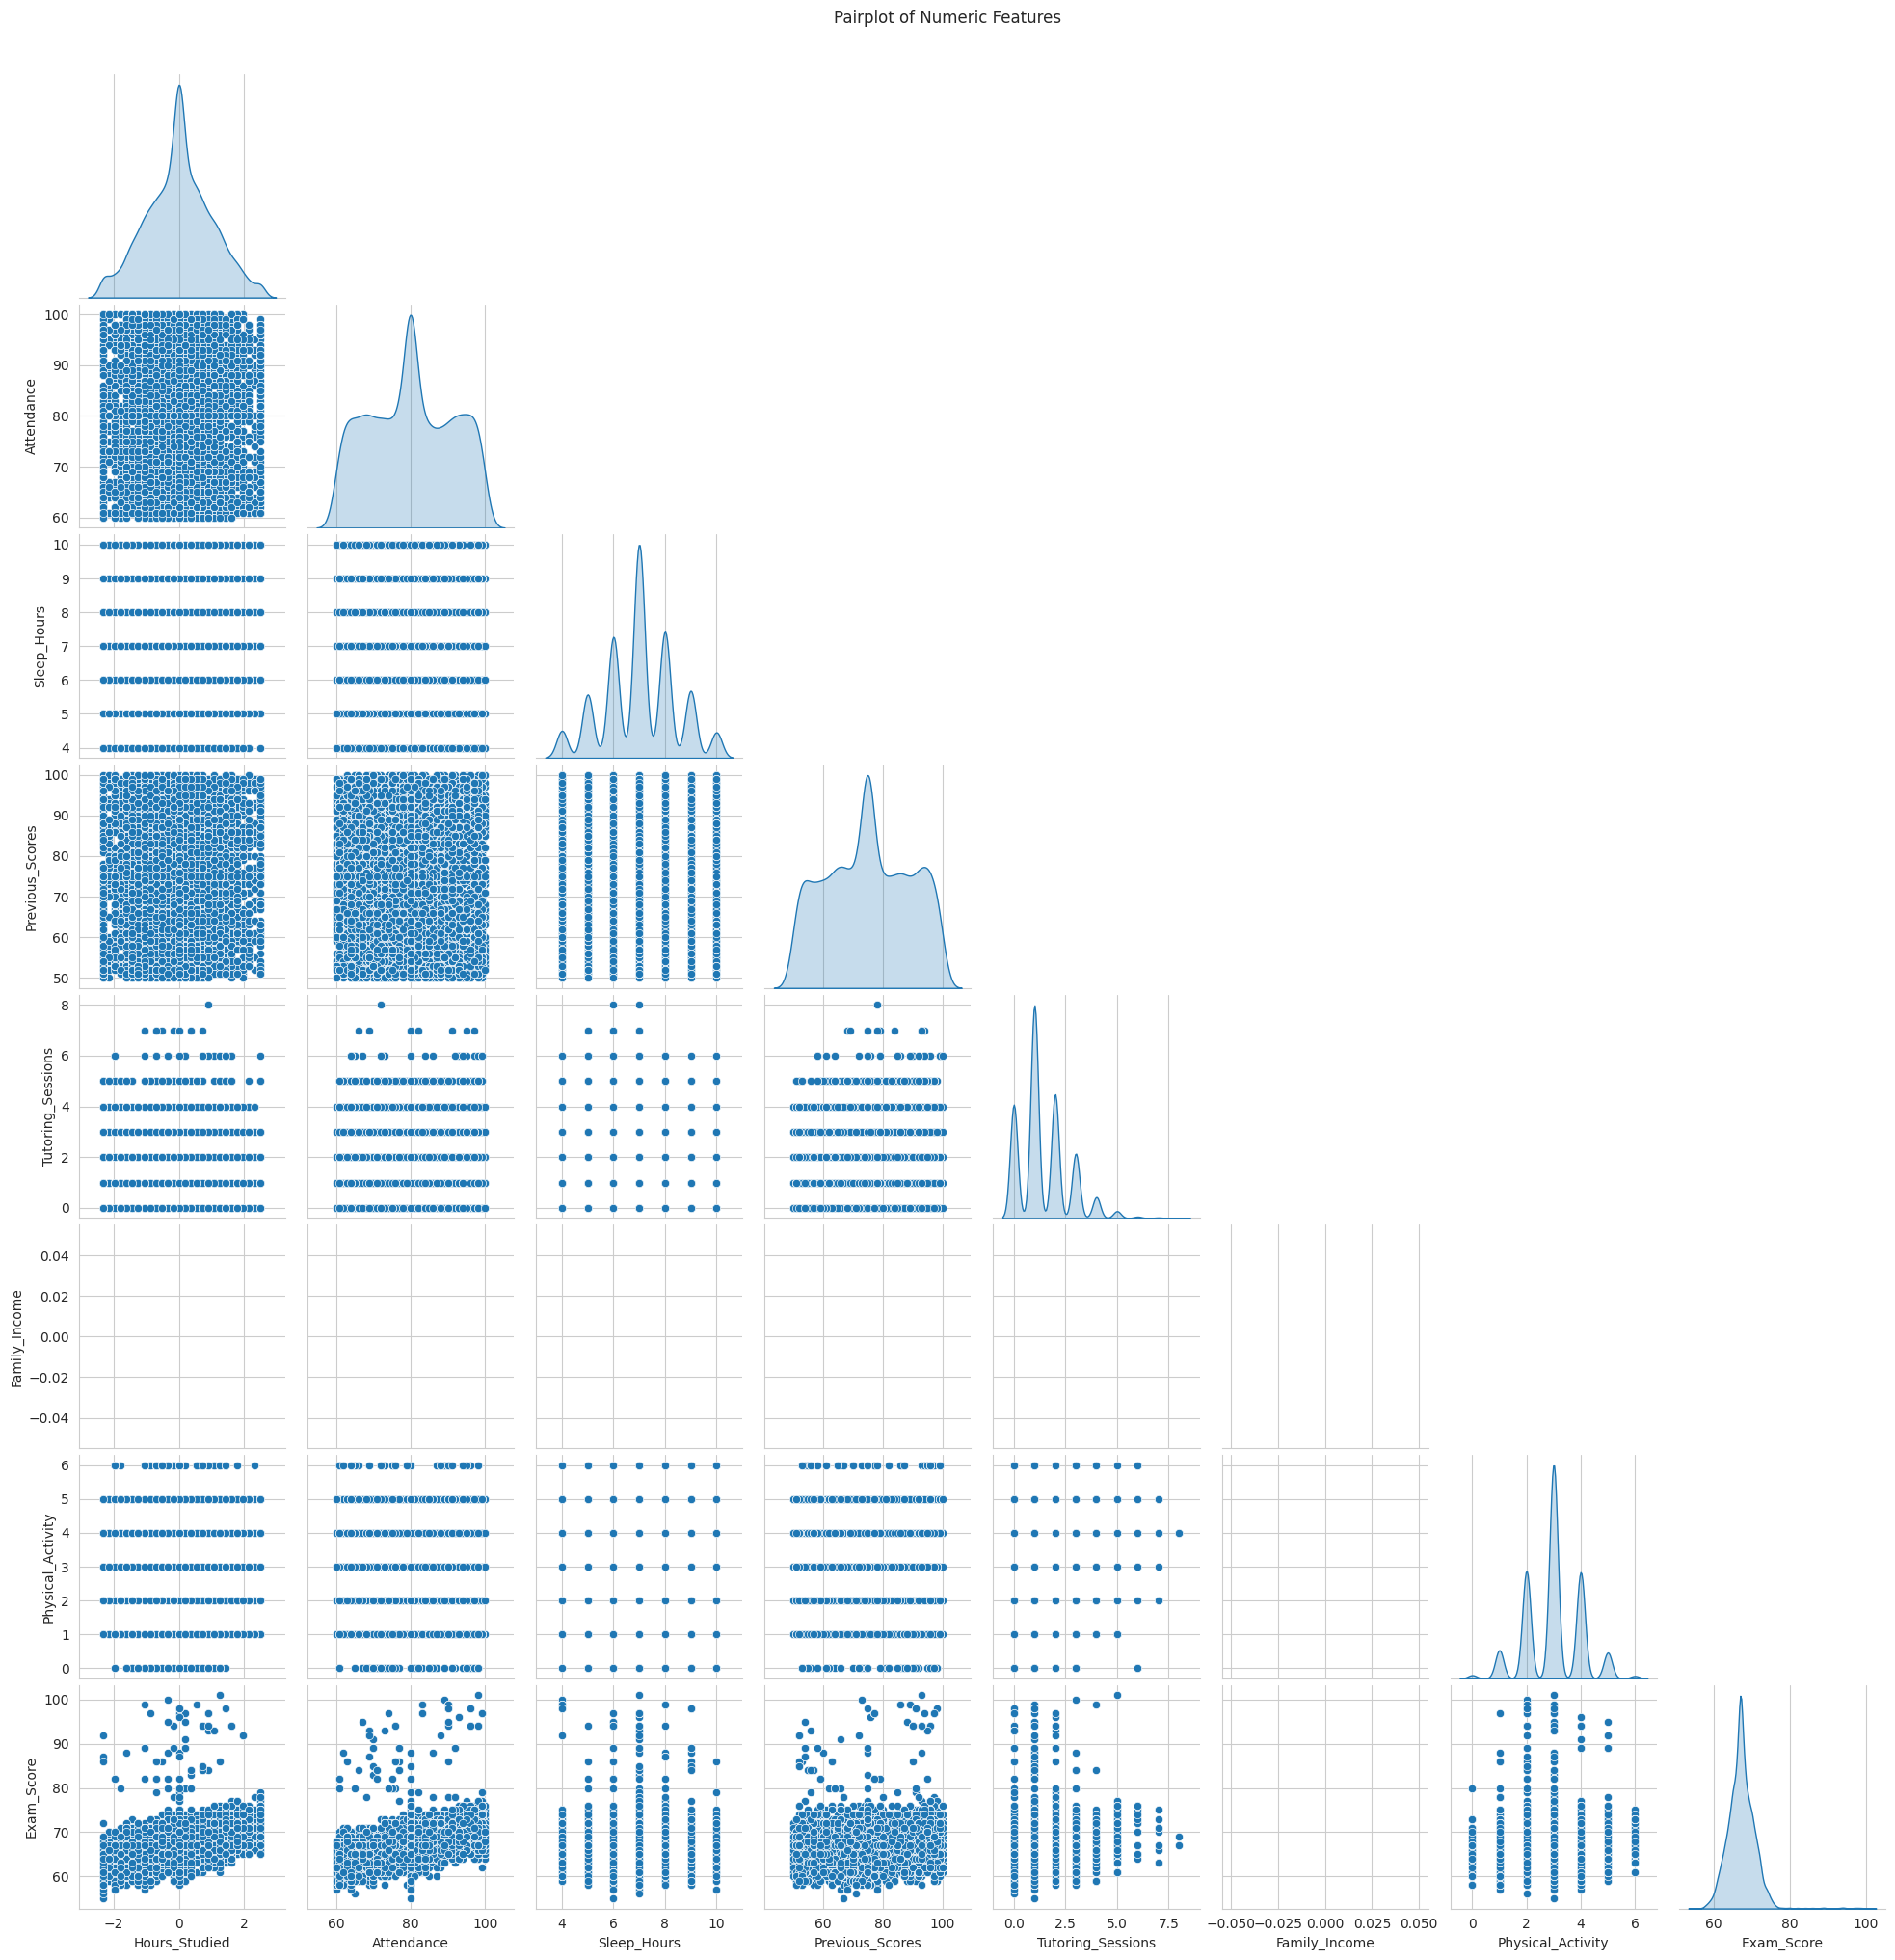

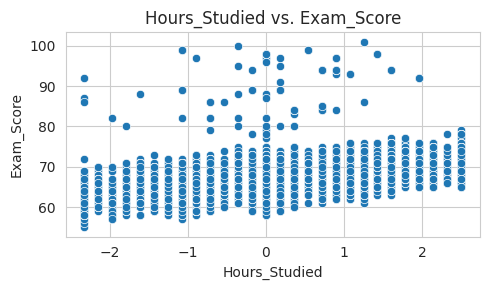

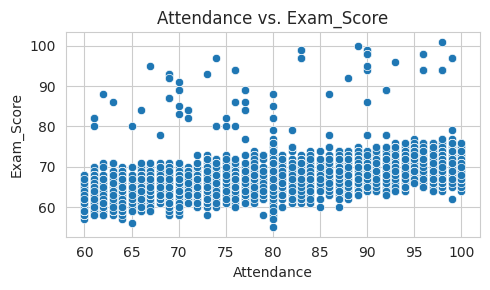

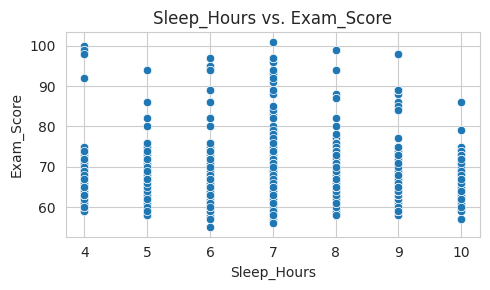

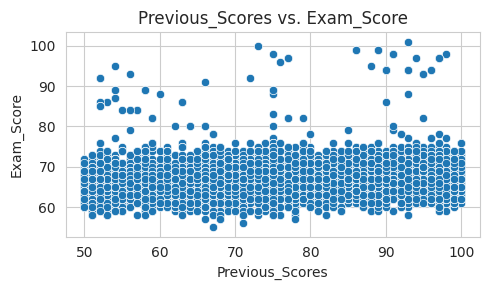

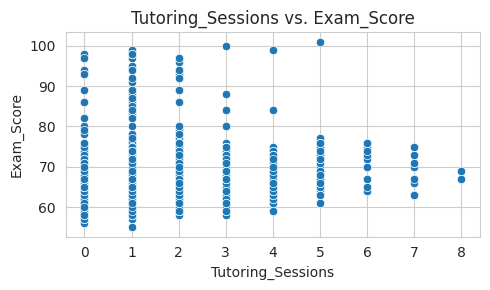

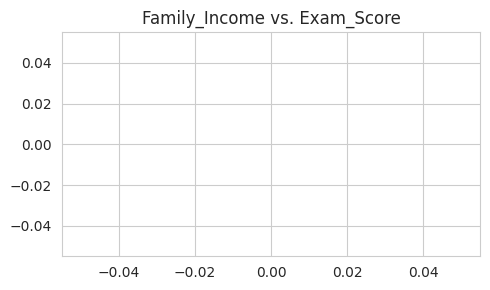

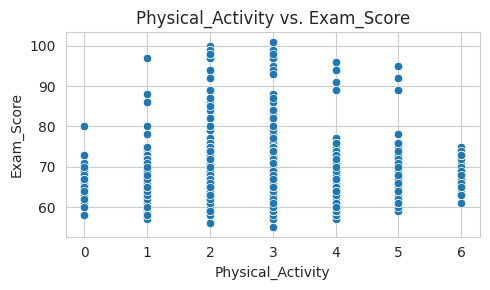

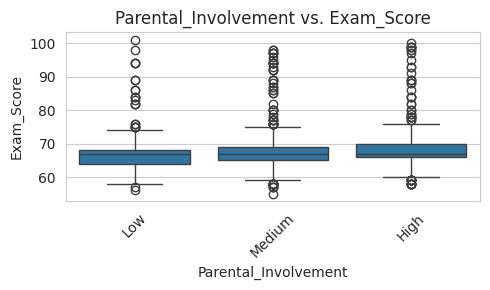

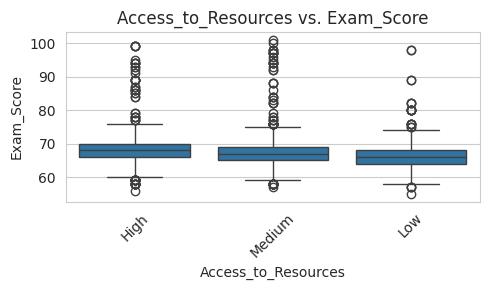

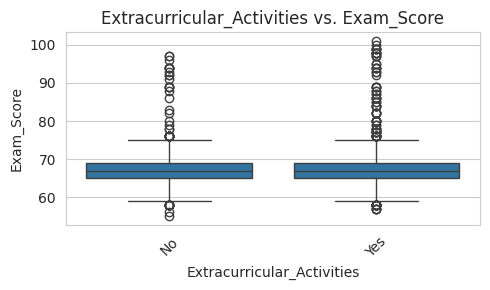

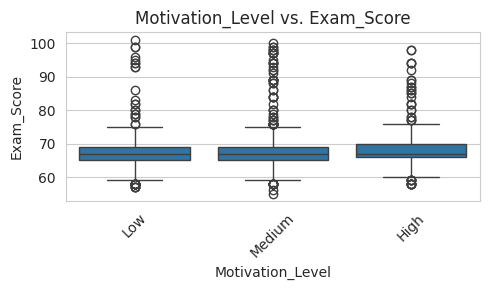

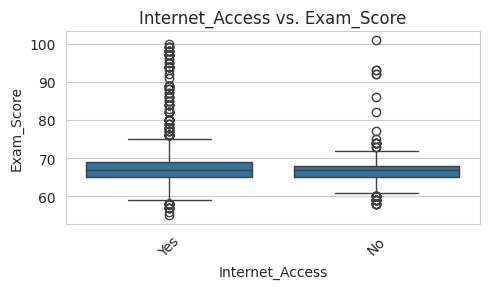

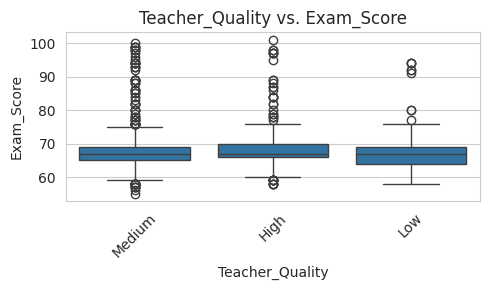

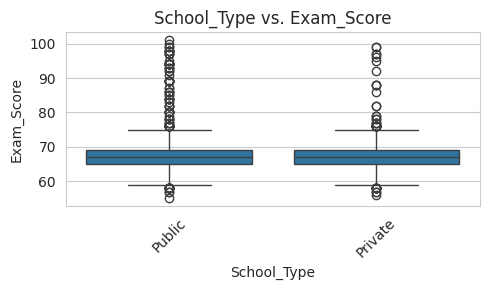

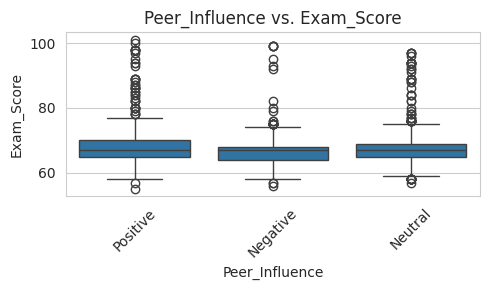

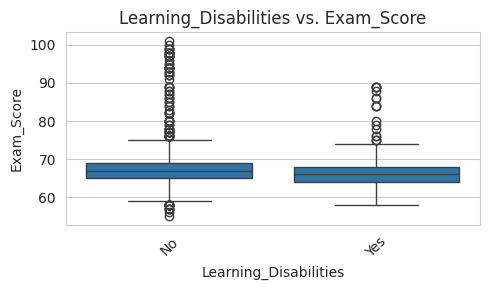

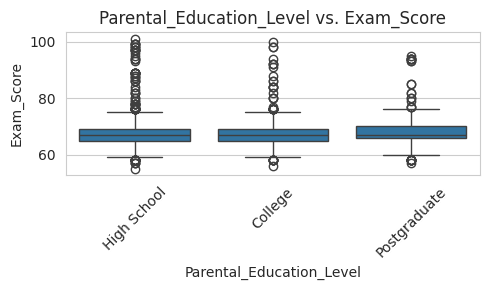

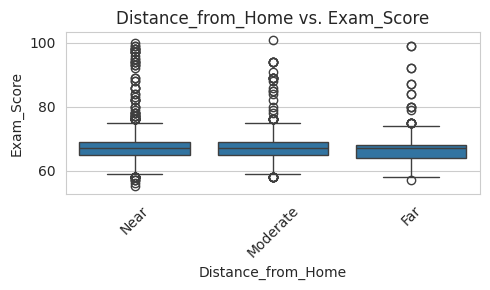

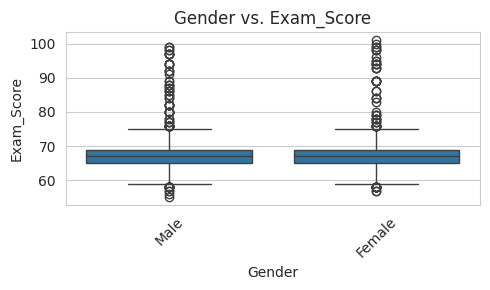

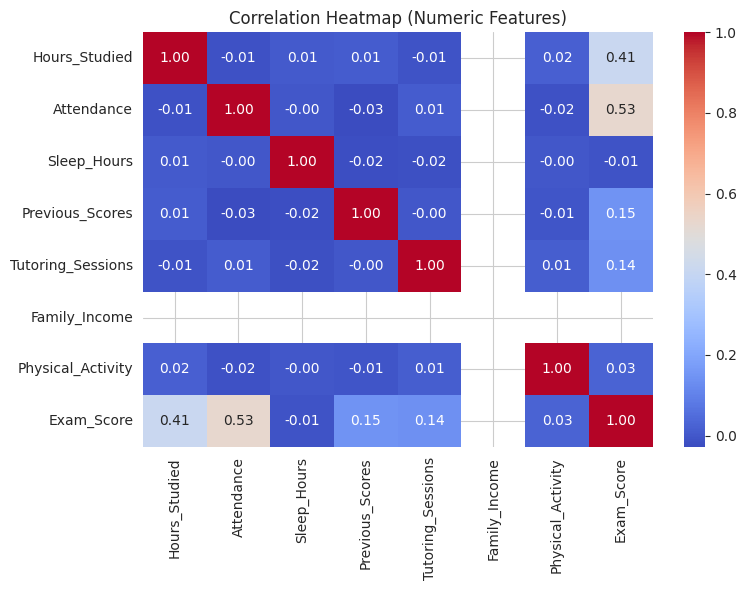

In [ ]:
#####################################
# ADVANCED EDA SECTION
#####################################

import seaborn as sns
import matplotlib.pyplot as plt

# 1) UNIVARIATE ANALYSIS

# 1A) Histograms & KDE for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("=== Histograms & KDE for Numeric Columns ===")
for col in numeric_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# 1B) Boxplots for numeric columns (quick outlier check)
# for col in numeric_cols:
#     plt.figure(figsize=(4,3))
#     sns.boxplot(x=df[col])
#     plt.title(f"Boxplot: {col}")
#     plt.tight_layout()
#     plt.show()

# 1C) Countplots for any remaining categorical columns
cat_cols = df.select_dtypes(include=[object]).columns.tolist()
print("=== Countplots for Categorical Columns ===")
for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2) BIVARIATE ANALYSIS

# 2A) Pairwise Scatter among numeric columns
print("=== Pairwise Scatter (Pairplot) ===")
if len(numeric_cols) <= 10:
    sns.pairplot(df[numeric_cols], corner=True, diag_kind='kde')
    plt.suptitle("Pairplot of Numeric Features", y=1.02)
    plt.show()

# 2B) If 'Exam_Score' is numeric, let's see correlation with each numeric col
if "Exam_Score" in df.columns:
    for col in numeric_cols:
        if col != "Exam_Score":
            plt.figure(figsize=(5,3))
            sns.scatterplot(x=df[col], y=df["Exam_Score"])
            plt.title(f"{col} vs. Exam_Score")
            plt.tight_layout()
            plt.show()

# 2C) Boxplots or Violin plots for each categorical vs. 'Exam_Score'
if "Exam_Score" in df.columns and cat_cols:
    for col in cat_cols:
        plt.figure(figsize=(5,3))
        sns.boxplot(x=col, y="Exam_Score", data=df)
        plt.title(f"{col} vs. Exam_Score")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 3) MULTIVARIATE - CORRELATION HEATMAP
num_data = df.select_dtypes(include=[np.number])
if num_data.shape[1] > 1:
    plt.figure(figsize=(8,6))
    corr_matrix = num_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap (Numeric Features)")
    plt.tight_layout()
    plt.show()


This section goes beyond basic histograms and countplots to provide a more thorough Exploratory Data Analysis (EDA). We focus on univariate analysis (histograms, countplots), bivariate analysis (pairwise scatterplots, scatter vs. Exam_Score, and boxplots vs. Exam_Score), and a multivariate correlation heatmap among numeric features. This helps uncover potential relationships, outliers, distribution shapes, and important correlations.

df.select_dtypes(include=[np.number]) retrieves a list of columns that are numeric (float64 or int64). We store these in numeric_cols.
For each numeric column col, we create a histogram with kde=True to overlay a Kernel Density Estimate curve, providing a smoothed view of the distribution.
bins=20 ensures we have a moderate bin count for clarity.
plt.tight_layout() helps avoid label overlap, and plt.show() displays the figure.
Why: Histograms and KDE plots let us see if a column is skewed (long tail), bimodal (two peaks), or fairly symmetric. This is crucial for deciding on transformations like log-scaling or outlier handling.

A boxplot is a quick way to visualize the median, interquartile range (IQR), and potential outliers for a numeric column.
If you uncomment this section, for each numeric column, it will show a horizontal boxplot.
Why: This helps identify extreme values that might need clipping or further investigation. If you encountered an error with certain columns, you can skip or fix them first (e.g., ensure the column is truly numeric).

df.select_dtypes(include=[object]) picks up columns that remain as strings (categorical data).
A countplot shows how many occurrences of each category exist in a given column (like “Low,” “Medium,” “High”).
Why: This reveals if one category dominates (class imbalance) or if the distribution is relatively balanced. For example, if “High” is extremely rare, that might be relevant for modeling or further analysis.

A pairplot (from Seaborn) creates a grid of scatterplots for every pair of numeric columns, plus diagonal histograms (or KDE plots) for each individual column.
We only run it if there are 10 or fewer numeric columns (if len(numeric_cols) <= 10) to avoid an overly cluttered matrix.
corner=True means we only show the lower triangle of the pairwise plots, reducing redundancy.
diag_kind='kde' uses a KDE curve on the diagonal instead of a histogram.
Why: This quickly reveals linear or non-linear relationships between any two numeric columns (e.g., Hours_Studied vs. Exam_Score) and can also show potential cluster patterns or outliers.

We specifically check if the column "Exam_Score" exists (the target variable).
For every numeric column other than "Exam_Score", we plot a scatterplot with that column on the x-axis and "Exam_Score" on the y-axis.
Why: This highlights potential correlations. A positive slope might mean higher Hours_Studied leads to higher Exam_Score. A random scatter might indicate no strong relationship. This is key for feature selection and understanding what influences the target variable.

If the dataset has a numeric Exam_Score and some remaining categorical columns (cat_cols), we create a boxplot for each category’s distribution of Exam_Score.
Why: This helps see if, for example, “High” Teacher_Quality yields a higher median exam score than “Low.” Or if “Yes” Extracurricular_Activities students have a different exam score distribution than “No.”
Rotation=45 for x-axis labels ensures categories remain readable if there are many or long category names.

num_data = df.select_dtypes(include=[np.number]) extracts only numeric columns from the DataFrame.
corr_matrix = num_data.corr() computes the Pearson correlation between every pair of numeric features.
sns.heatmap(...) visualizes these correlations in a grid, with annot=True to print the correlation coefficient and a color gradient (red for positive, blue for negative, etc.).
Why: This provides a high-level overview of which features are strongly or weakly correlated. For instance, if Previous_Scores is strongly correlated with Exam_Score, that’s an important insight for modeling.
We only do this if there is more than 1 numeric column (if num_data.shape[1] > 1).

Univariate: Histograms (and optional boxplots) let us see distribution shapes and potential outliers.
Bivariate: Pairplots, scatterplots vs. Exam_Score, and boxplots vs. Exam_Score reveal relationships between features and the target or between features themselves.
Multivariate: The correlation heatmap shows how all numeric columns interrelate, which is vital for feature selection or identifying collinearity.
